In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
%config Completer.use_jedi = False
%matplotlib inline

In [9]:
df = pd.read_csv('Ready_for_pca.csv', index_col=0)

In [10]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9998,9999,10000
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078,6630d501-838c-4be4-a59c-6f58c814ed6a,70ddaa89-b726-49dc-9022-2d655e4c7936,05a49ee3-8fd5-453a-a5f3-82b6cd986856,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,...,e8f40610-af75-4bfd-baf8-0b15918b04ed,89d0d064-307e-4f21-a5b4-6ec1137c8bfc,24f1d865-3d58-495f-9dc9-b5927a1fd40a,ce7abedd-6437-4609-9123-8a4a8234381e,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,c60df12b-a50b-4397-ae57-98381a0d3960,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,e8307ddf-9a01-4fff-bc59-4742e03fd24f,3775ccfc-0052-4107-81ae-9657f81ecdf3,9de5fb6e-bd33-4995-aec8-f01d0172a499
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley,Pioneer,Oklahoma City,Saint Cloud,Cincinnati,...,Little Eagle,Gilmore City,Smyrna,Haubstadt,Machias,West Kill,Mount Holly,Mobeetie,Carrollton,Clarkesville
State,AK,MI,OR,CA,TX,GA,TN,OK,FL,OH,...,SD,IA,NY,IN,ME,NY,VT,TX,GA,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach,Scott,Oklahoma,Osceola,Hamilton,...,Corson,Humboldt,Chenango,Gibson,Washington,Greene,Rutland,Wheeler,Carroll,Habersham
Zip,99927,48661,97148,92014,77461,31030,37847,73109,34771,45237,...,57639,50541,13464,47639,4654,12492,5758,79061,30117,30523
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032,36.4342,35.43313,28.27646,39.19296,...,45.7036,42.71548,42.68582,38.17985,44.77104,42.18491,43.43391,35.52039,33.58016,34.70783
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904,-84.27892,-97.52463,-81.16273,-84.4523,...,-100.7717,-94.44913,-75.61754,-87.57497,-67.55341,-74.33574,-72.78734,-100.4418,-85.13241,-83.53648
Population,38,10446,3735,13863,11352,17701,2535,23144,17351,20193,...,338,836,1378,4261,3209,210,640,406,35575,12230
Area,Urban,Urban,Urban,Suburban,Suburban,Urban,Suburban,Suburban,Suburban,Rural,...,Rural,Rural,Rural,Suburban,Rural,Urban,Rural,Rural,Urban,Urban
Timezone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles,America/Chicago,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York,...,America/Denver,America/Chicago,America/New_York,America/Chicago,America/New_York,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York


In [11]:
df['Churn'].replace({
    'No': 0,
    'Yes': 1
}, inplace=True)

In [12]:
df = df.loc[:,['Age', 'Income', 'Outage_sec_perweek', 'Tenure',
          'MonthlyCharge', 'Bandwidth_GB_Year']]

In [13]:
df_norm = (df - df.mean()) / df.std()

In [14]:
df_norm

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
1,0.823601,-0.416592,-0.961364,-1.095605,-0.060321,-1.201158
2,-1.457267,-0.747729,0.414497,-1.319287,1.587677,-1.251132
3,-0.177756,-0.056018,-0.068210,-0.740234,-0.337131,-0.646092
4,-0.289018,-0.881954,1.285440,-0.687354,-1.240461,-0.593068
5,1.658065,0.139335,-0.418944,-1.298886,-0.537182,-1.506661
...,...,...,...,...,...,...
9995,-0.400280,0.926957,-0.923679,-0.245342,-0.700218,0.749113
9996,-0.010863,0.895056,-0.335694,1.340074,-0.328178,1.504614
9998,-0.010863,-0.056018,-1.543931,0.133487,-0.134745,0.369577
9999,-0.789696,-0.990976,0.431394,1.455050,1.810810,1.483961


In [15]:
pca = PCA(n_components=df.shape[1]) # 6 columns 

In [16]:
pca.fit(df_norm)
df_pca = pd.DataFrame(pca.transform(df_norm),
                     columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])


In [17]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.649259,-0.637616,-1.011953,0.092225,0.511513,-0.045279
1,-1.723723,1.630348,0.638735,-1.264418,1.019503,-0.075671
2,-0.993944,-0.223647,0.136311,-0.188414,-0.143012,0.077138
3,-0.931700,0.178233,0.000101,-0.943046,-1.753584,0.111507
4,-2.026927,-0.672650,-1.238470,1.004368,-0.284533,-0.073432
...,...,...,...,...,...,...
9556,0.309536,-1.206148,0.817451,0.382395,0.292977,0.730364
9557,1.986955,-0.645023,0.512474,0.659706,0.029096,0.136240
9558,0.319987,-1.179869,-0.208041,-0.145679,0.983714,0.181271
9559,2.172631,1.616723,-0.068802,-1.045387,0.974762,-0.090838


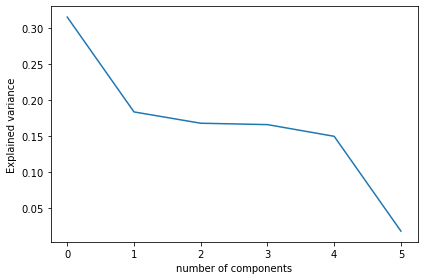

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.tight_layout()
plt.show()

In [20]:
pca.explained_variance_ratio_ * 100

array([31.55474807, 18.35518632, 16.77995968, 16.58852647, 14.95848572,
        1.76309374])

In [23]:
cov_matrix = np.dot(df_norm.T, df_norm) / df.shape[0]

In [24]:
cov_matrix

array([[ 9.99895408e-01, -3.96856466e-03, -1.45167701e-02,
         1.27028459e-02,  8.58506228e-03, -2.27539383e-02],
       [-3.96856466e-03,  9.99895408e-01, -2.69267624e-03,
         5.61647355e-05, -1.25518204e-02, -8.82427717e-04],
       [-1.45167701e-02, -2.69267624e-03,  9.99895408e-01,
         1.87528019e-03,  1.00111503e-01,  1.58639536e-02],
       [ 1.27028459e-02,  5.61647355e-05,  1.87528019e-03,
         9.99895408e-01, -4.28875099e-03,  8.91181477e-01],
       [ 8.58506228e-03, -1.25518204e-02,  1.00111503e-01,
        -4.28875099e-03,  9.99895408e-01,  5.82445422e-02],
       [-2.27539383e-02, -8.82427717e-04,  1.58639536e-02,
         8.91181477e-01,  5.82445422e-02,  9.99895408e-01]])

In [27]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

In [33]:
eigenvalues

[1.8930868626998936,
 1.1011959913746683,
 1.0066922783426184,
 0.9952074869942611,
 0.8974152711292118,
 0.1057745600398268]

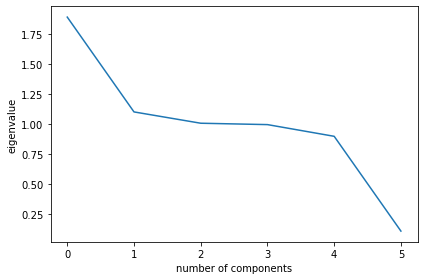

In [31]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.tight_layout()
plt.show()

#  only PC 0-3 are useful because they have eigenvalue of 1 or higher 

In [36]:
loadings = pd.DataFrame(pca.components_.T,
                       columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                       index = df.columns)

In [37]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Age,-0.007860,-0.043443,-0.796420,0.584060,-0.147761,0.028394
Income,-0.001307,-0.103884,0.583372,0.803207,0.061173,0.000163
Outage_sec_perweek,0.019197,0.700801,0.128385,0.050707,-0.699592,-0.005100
Tenure,0.705303,-0.060045,-0.015921,0.007982,-0.037998,-0.705110
MonthlyCharge,0.044823,0.701837,-0.092441,0.105043,0.695287,-0.049124
Bandwidth_GB_Year,0.707182,-0.004297,0.010479,-0.008019,0.011290,0.706806
